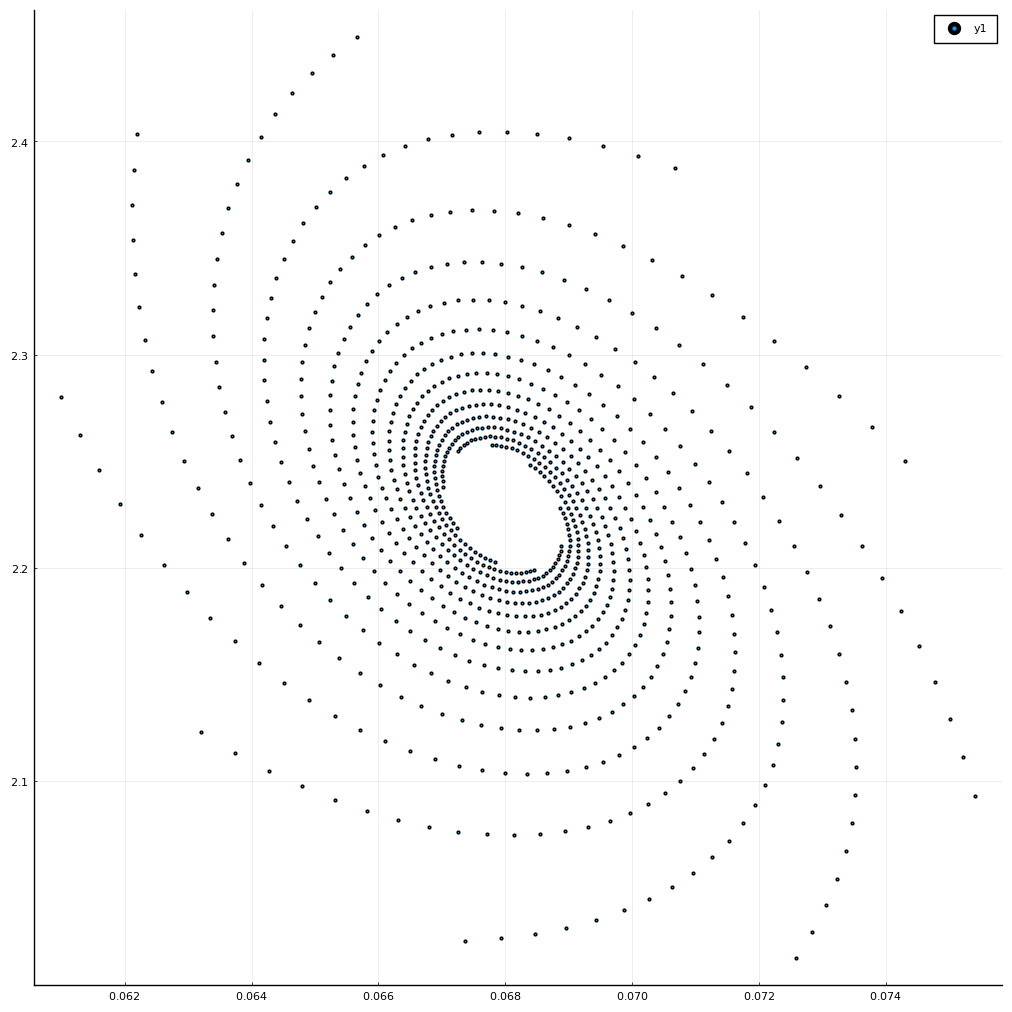

simulation (generic function with 1 method)

In [3]:
using DynamicalSystems
using Plots

function f(x,r0)
        r0/(1+(r0-1)*x)
end

function g(y)
    1/(1+y)
end

function gen_model(u,p,n)
    x, y = u
    c, r0 = p
    f0(x) = f(x,r0)
    xn = x*f(x,r0)*g(y)
    yn = c*x*f(x,r0)*(1-g(y))
    return SVector(xn, yn)
end

function hassel(u,p,n)
    x,y = u
    r,a,b,c = p
    xn = r*x*exp(-a*y)/(1+x)^b
    yn = c*x*(1-exp(-a*y))
    return SVector(xn,yn)
end

c=2.0
r0=2.0
p0 = [2.0,2.0]
u0 = [2.0,2.0]
a = 0.5
b = 19.1
r = 10.7
c = 49.0
pars_hassel = [r,a,b,c]
init_values = [0.068, 2.22]
function simulation(model,tend,init_values,parameters)
    sistem=DiscreteDynamicalSystem(model, init_values,parameters)
    A = trajectory(sistem,tend)
    pyplot()
    scatter(A[:,1],A[:,2],markersize=2,size=(1000,1000))
end

In [4]:
using Interact

ui = @manipulate for h0 in slider(0.05:0.001:0.07),p0 in slider(2.0:0.01:3.0)
    init_values=[h0,p0]
    simulation(hassel,1000,init_values,pars_hassel)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/andrei/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/andrei/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/andrei/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), Asset("css", nothing, "/home/andrei/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), Asset("css", nothing, "/home/andrei/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f71c5cd15a0, Task (runnable) @0x00007f71c5cd15a0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.05\",\"0.051\",\"0.052\",\"0.053\",\"0.054\",\"0.055\",\"0.056\",\"0.057\",\"0.058\",\"0.059\",\"0.06\",\"0.061\",\"0.062\",\"0.063\",\"0.064\",\"0.065\",\"0.066\",\"0.067\",\"0.068\",\"0.069\",\"0.07\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"121664

In [ ]:
simulation